In [1]:
!pip install pycountry_convert

     -------------------------------------- 323.6/323.6 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 10.1/10.1 MB 7.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Using cached exceptiongroup-1.1.3-py3-none-any.whl (14 kB)
     ------------------------------------- 204.4/204.4 kB 12.9 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681895 sha256=f25015b880fa8ad37c159dc25ce1a4003396691cf58cd28c328bc48ff9a6d061
  Stored in directory: c:\users\win\appdata\local\pip\cache\wheels\03\57\cc\290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycount

ERROR: Could not install packages due to an OSError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'C:\\Python310\\Scripts\\pypprint.exe' -> 'C:\\Python310\\Scripts\\pypprint.exe.deleteme'


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install --upgrade nbformat

  Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'C:\\Python310\\Scripts\\jupyter-trust.exe' -> 'C:\\Python310\\Scripts\\jupyter-trust.exe.deleteme'


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:

import warnings
import numpy as np
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None 

In [4]:
life_expectancy_data = pd.read_csv("Life Expectancy Data.csv")
life_expectancy_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
life_expectancy_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# Countries with Highest Life Expectancy
country_vs_life = life_expectancy_data.groupby('Country', as_index=False)['Life expectancy '].mean()
country_vs_life.sort_values(by = 'Life expectancy ', ascending=False).head(10)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [5]:
# Countries with Lowest Life Expectancy
country_vs_life.sort_values(by = 'Life expectancy ', ascending = True).head(10)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


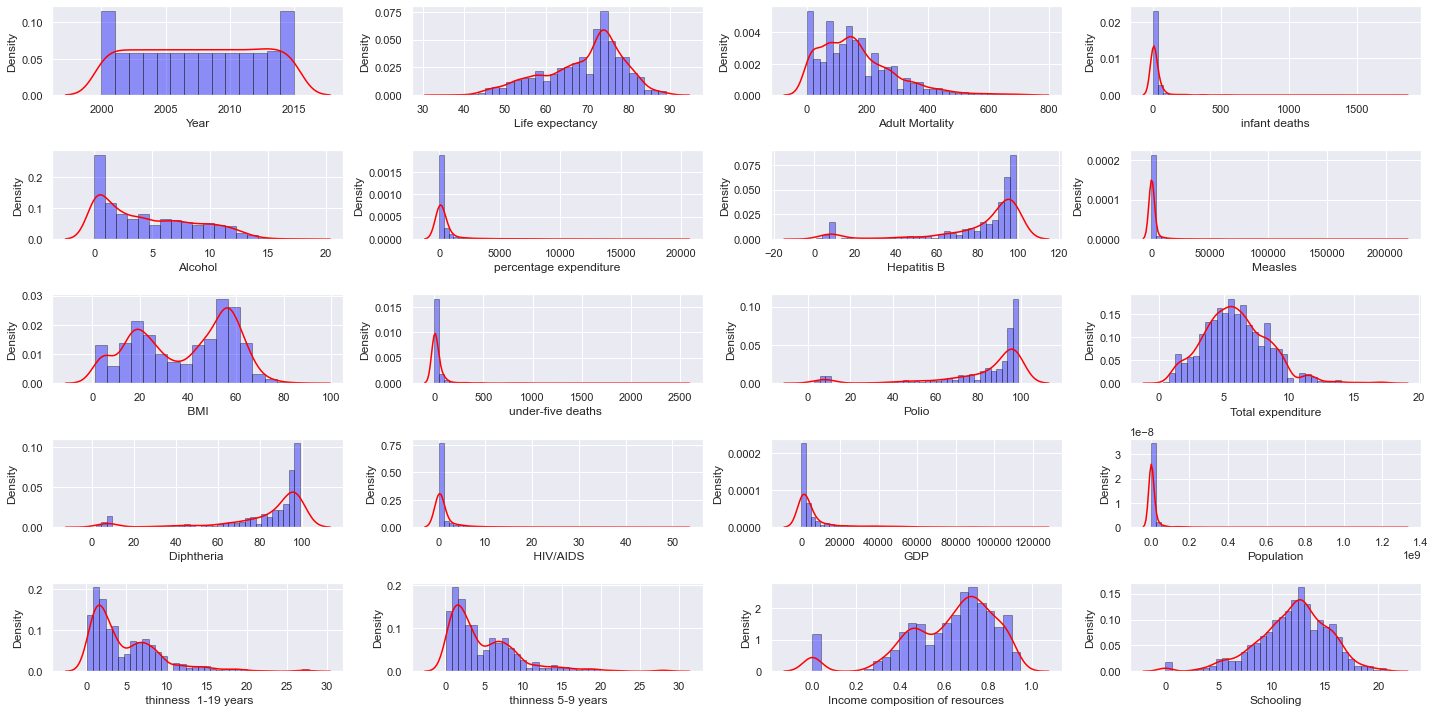

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

count = 1

fig = plt.figure(figsize = [20, 10])
cols = life_expectancy_data.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(life_expectancy_data[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    count += 1
plt.tight_layout()
plt.show()

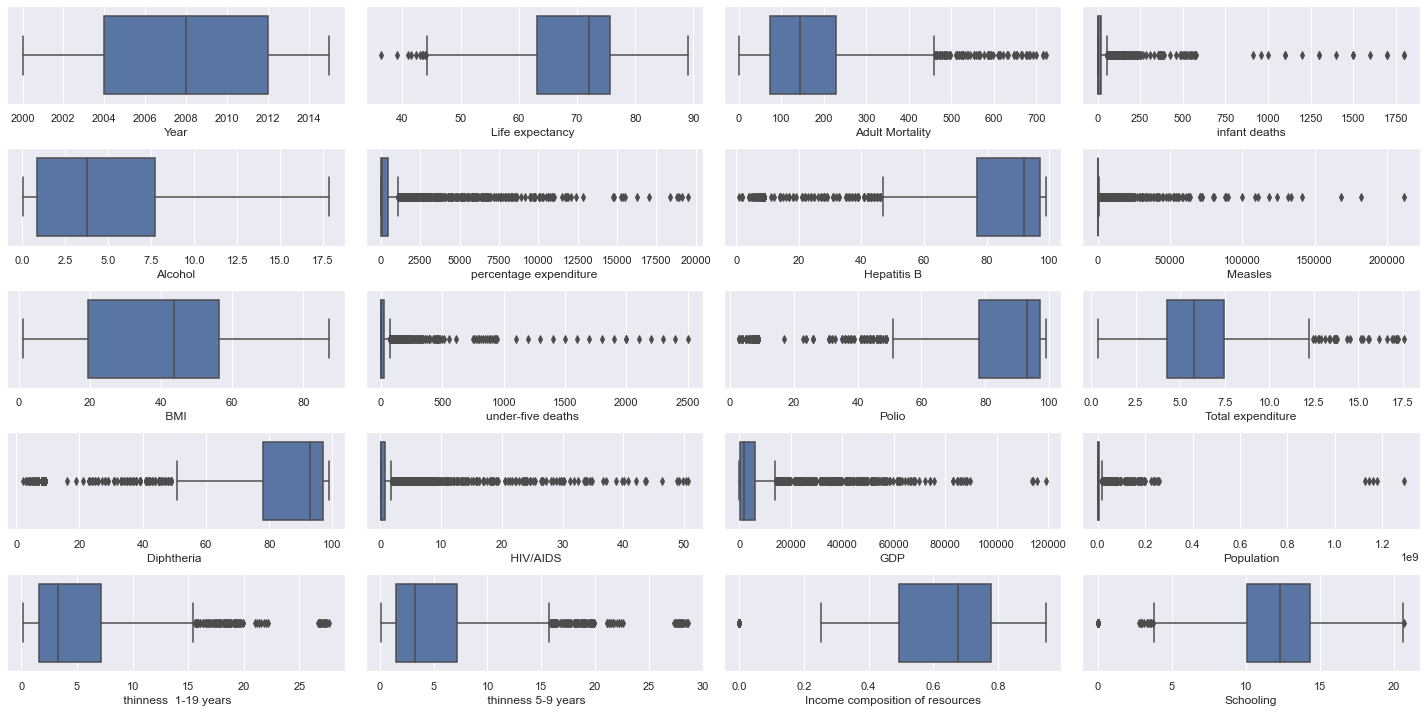

In [7]:
count = 1

fig = plt.figure(figsize = [20, 10])
cols = life_expectancy_data.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.boxplot(x = life_expectancy_data[col])
    count += 1
plt.tight_layout()
plt.show()

In [8]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
continent = []
for country in life_expectancy_data['Country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append("Africa")
    
life_expectancy_data["Continent"] = continent
to_bubble = life_expectancy_data[["Country", "Year", "Life expectancy ", "GDP", "Population", "Continent"]]
to_bubble.dropna(inplace = True)

In [9]:
d = to_bubble.drop('Year', axis=1)
to_bubble = d.groupby(['Country', 'Continent']).mean().reset_index()
to_bubble['GDP'] = np.log10(to_bubble['GDP'])
to_bubble.head()

,Country,Continent,Life expectancy,GDP,Population
0,Afghanistan,Asia,58.19375,2.531499,9.972260e+06
1,Albania,Europe,75.15625,3.326280,6.969116e+05
2,Algeria,Africa,73.61875,3.454518,2.164983e+07
3,Angola,Africa,49.01875,3.295599,1.014710e+07
4,Argentina,South America,75.15625,3.845010,2.012120e+07


In [10]:
df = px.data.gapminder()

fig = px.scatter(to_bubble, x="GDP", y="Life expectancy ",
                 size="Population", color="Continent",
                 hover_name="Country", log_x=True, size_max=50)
fig.show()

In [13]:
Q1 = life_expectancy_data[cols].quantile(0.25)
Q3 = life_expectancy_data[cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((life_expectancy_data[cols] < (Q1 - 1.7 * IQR)) | (life_expectancy_data[cols] > (Q3 + 1.7 * IQR))).any(axis=1)

life_expectancy_data = life_expectancy_data[~outliers]

life_expectancy_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,Europe
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,Europe
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,Europe
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,Europe
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,Europe


In [15]:
life_expectancy_data.to_csv('data.csv', index=False)

In [16]:
to_bubble

,Country,Continent,Life expectancy,GDP,Population
0,Afghanistan,Asia,58.19375,2.531499,9.972260e+06
1,Albania,Europe,75.15625,3.326280,6.969116e+05
2,Algeria,Africa,73.61875,3.454518,2.164983e+07
3,Angola,Africa,49.01875,3.295599,1.014710e+07
4,Argentina,South America,75.15625,3.845010,2.012120e+07
...,...,...,...,...,...
138,Uruguay,South America,76.07500,3.856885,2.396771e+06
139,Uzbekistan,Asia,68.03125,2.813643,9.036317e+05
140,Vanuatu,Australia,71.38750,3.301083,1.230962e+05
141,Zambia,Africa,53.90625,2.909455,6.260246e+06


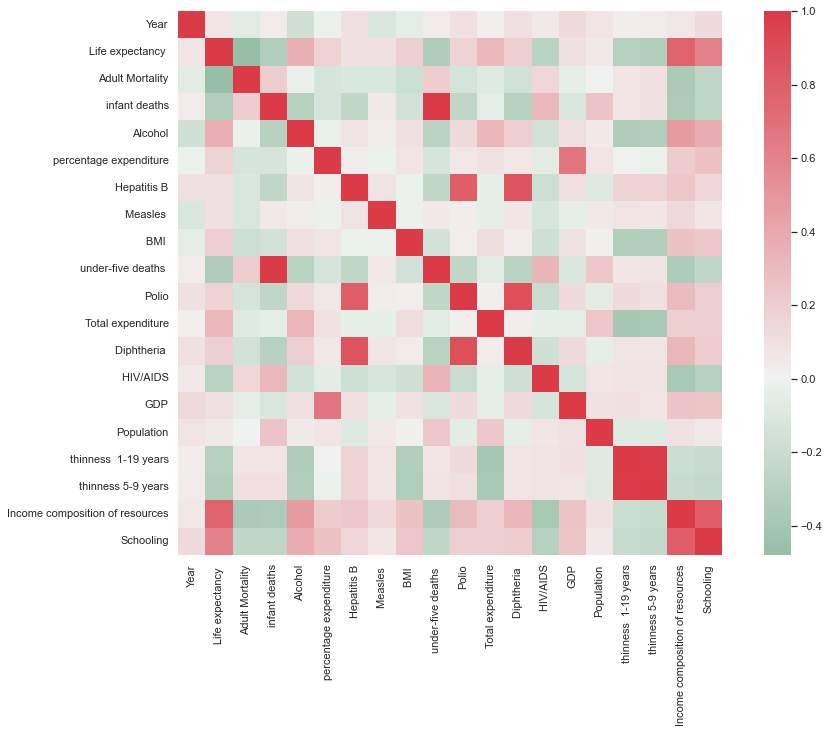

In [17]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(life_expectancy_data.corr(), cmap =cmap, center=0, annot=False, square=True);

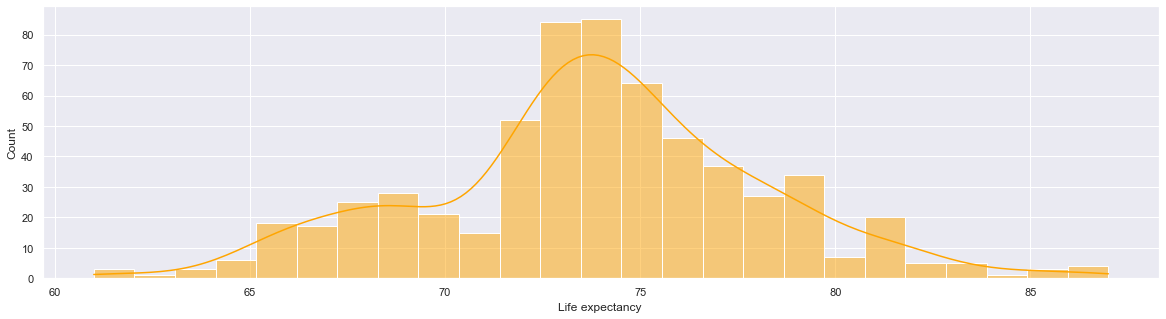

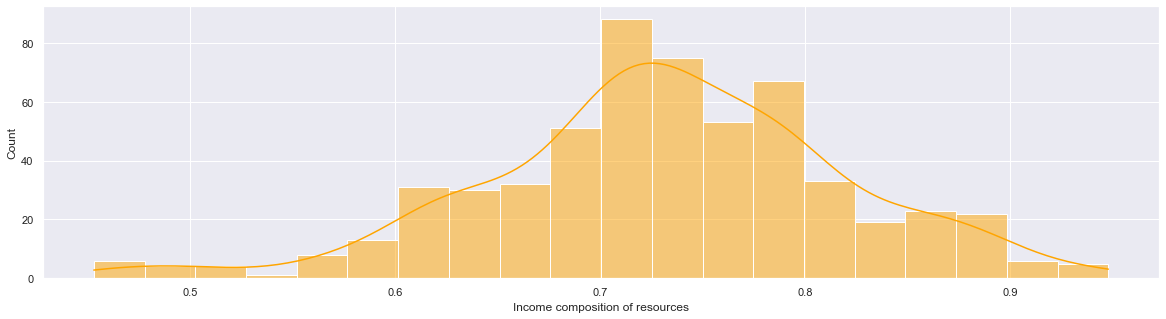

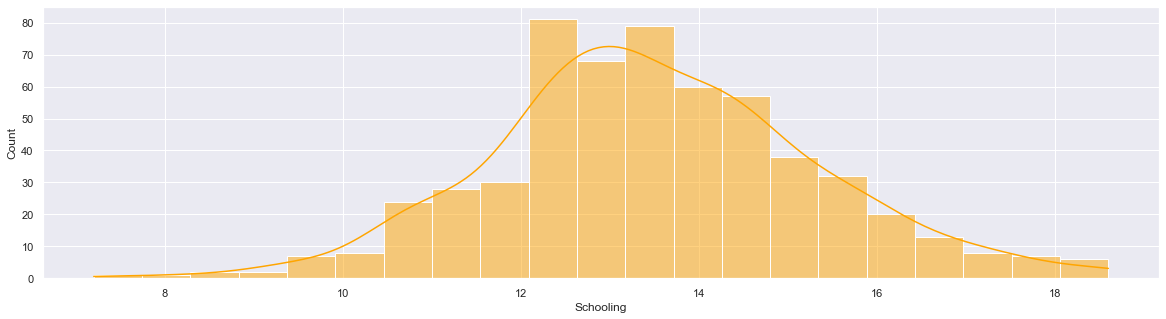

In [18]:
l= [life_expectancy_data['Life expectancy '].dropna(), life_expectancy_data['Income composition of resources'].dropna(), life_expectancy_data['Schooling'].dropna()]
for i in l:
    plt.figure(figsize=(20,5))
    sns.histplot(i, kde=True, color="orange")

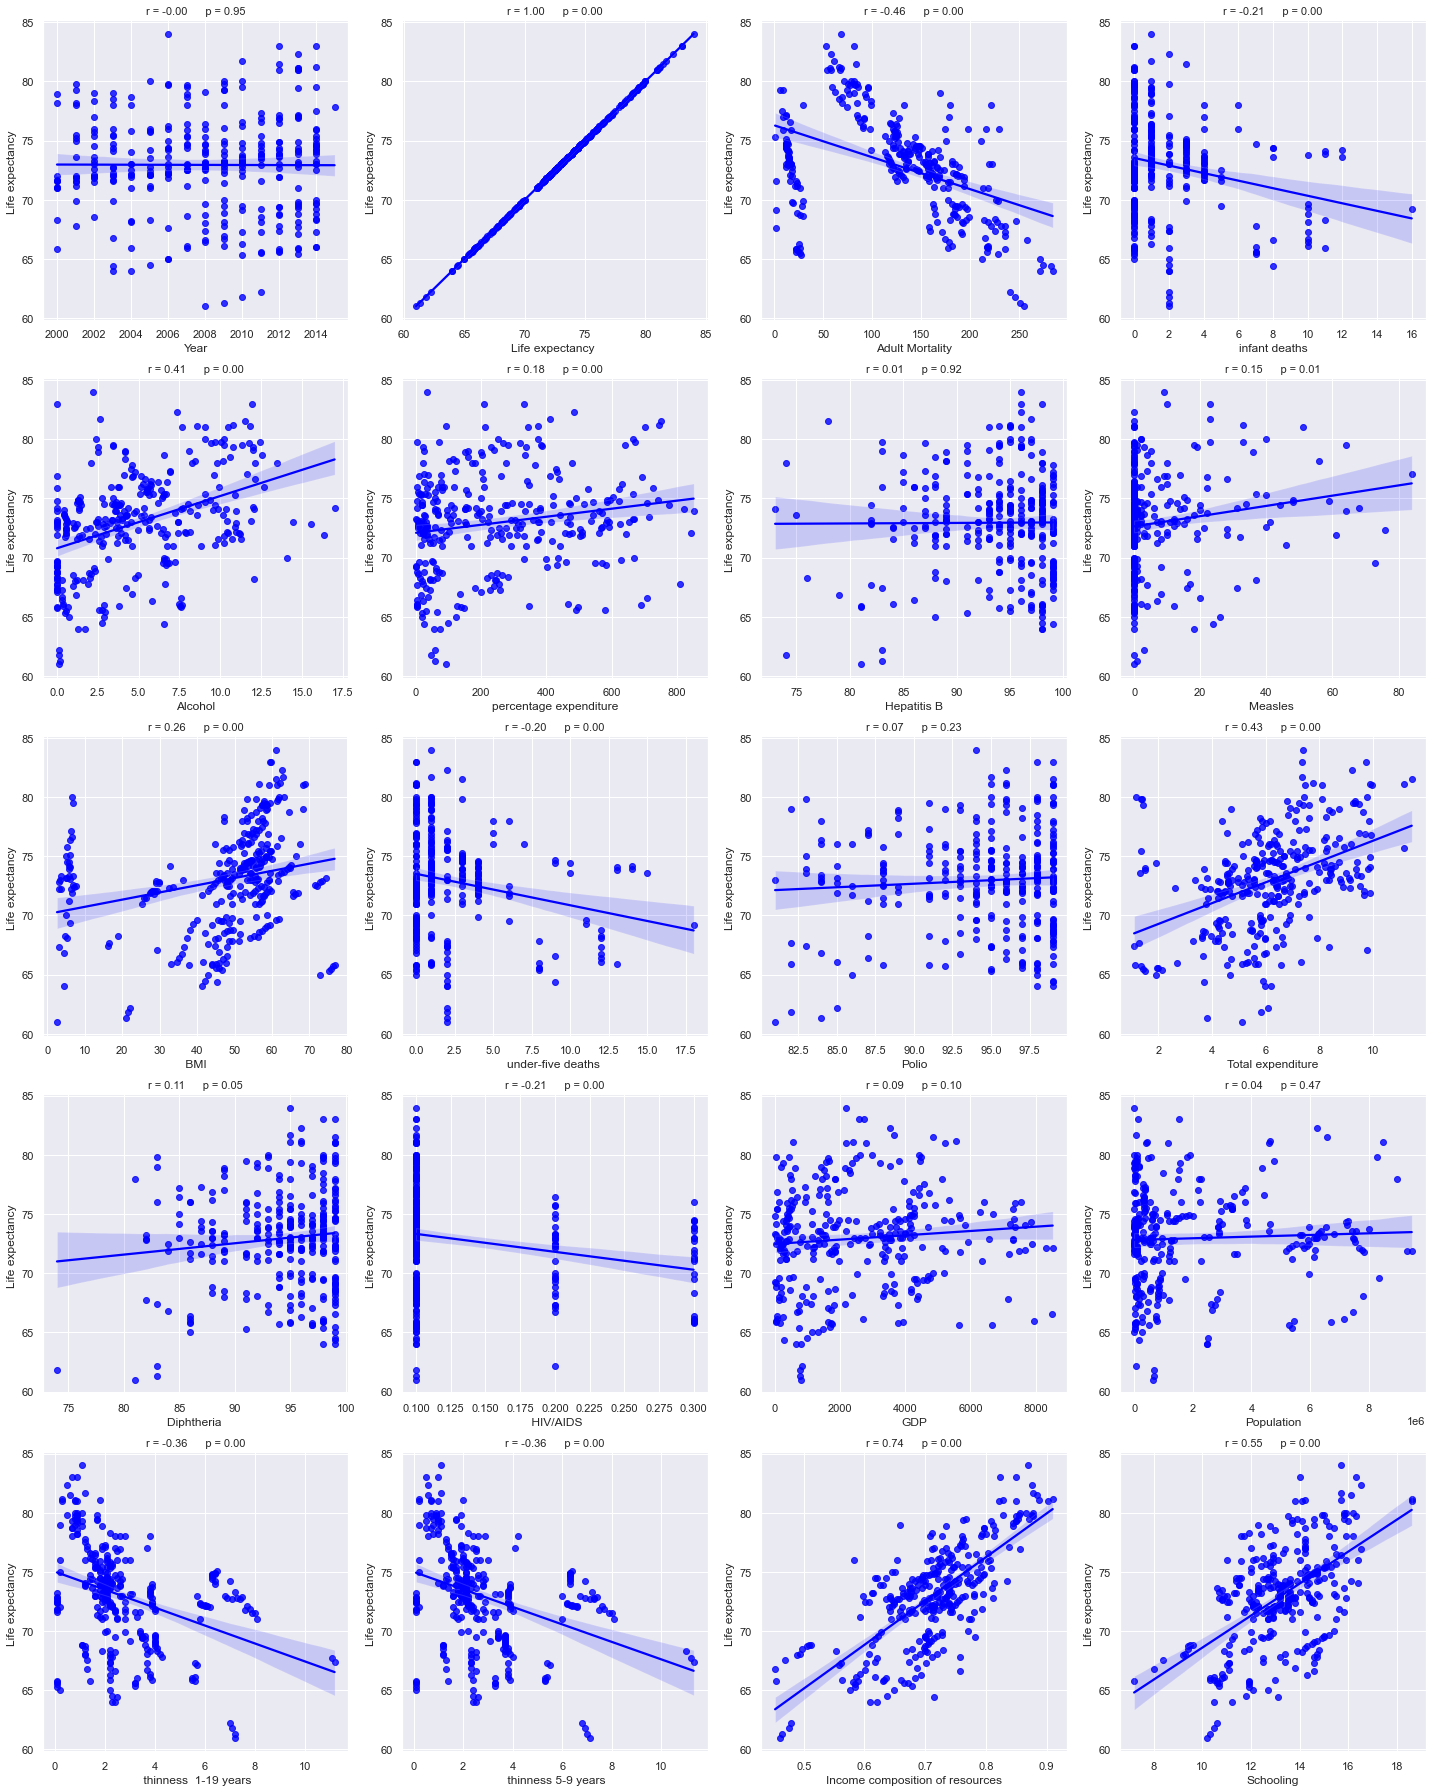

In [19]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*5))
numerical_feats = life_expectancy_data.dtypes[life_expectancy_data.dtypes != "object"].index
li_num_feats = list(numerical_feats)
li_not_plot = []
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
life_expectancy_data.dropna(inplace = True)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x = life_expectancy_data[li_plot_num_feats[i]],y = life_expectancy_data["Life expectancy "] , color = 'blue', ax = axs[r][c])
            stp = stats.pearsonr(life_expectancy_data[li_plot_num_feats[i]], life_expectancy_data["Life expectancy "])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
            
plt.tight_layout()    
sns.set(color_codes=True)
plt.show()

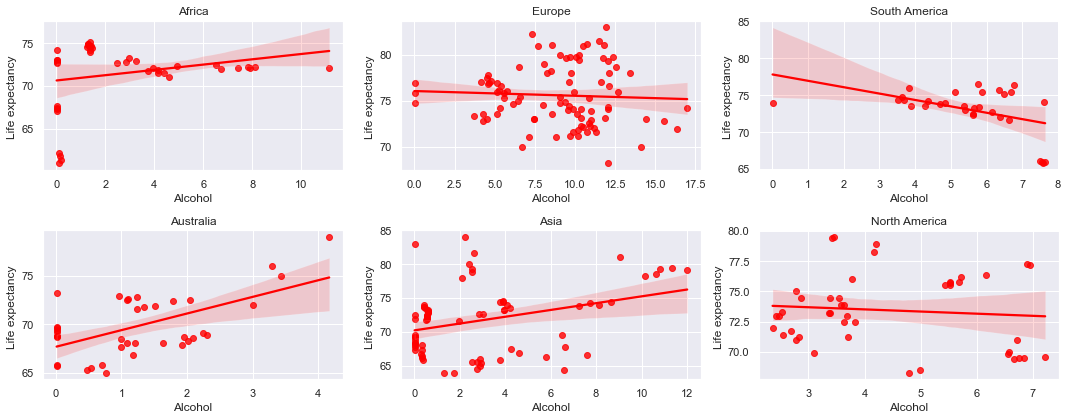

In [20]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5)

for conts, ax in zip(set(life_expectancy_data["Continent"]), axs.flat):
    Conts = life_expectancy_data[life_expectancy_data['Continent'] == conts]
    sns.regplot(x = Conts['Alcohol'],y = Conts["Life expectancy "], color = 'red', ax = ax).set_title(conts)

plt.tight_layout()    
sns.set(color_codes=True)
plt.show()

In [21]:
target = life_expectancy_data["Life expectancy "]
features = life_expectancy_data[life_expectancy_data.columns.difference(['Life expectancy '])]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [24]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 7 fold cross validation, 
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [4, 25, 47, 69, 91, 112,
                                                         134, 156, 178, 200]},
                   random_state=42, verbose=2)

In [26]:
rf_random.best_params_

{'n_estimators': 156,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [27]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor()   # n_estimators = 10
base_model.fit( X_test, Y_test)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,  X_test, Y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.5774 degrees.
Accuracy = 99.20%.
Model Performance
Average Error: 0.8856 degrees.
Accuracy = 98.79%.
Improvement of -0.41%.


In [28]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50, None],
    'max_features': [2, 3, 4, 'auto','sqrt'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [1, 2, 4, 8],
    'n_estimators': [10, 30, 100, 120, 150]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [29]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


1800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Python310\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Python310\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
   

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 50, None],
                         'max_features': [2, 3, 4, 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 4, 8],
                         'n_estimators': [10, 30, 100, 120, 150]},
             verbose=2)

In [30]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
Model Performance
Average Error: 0.8480 degrees.
Accuracy = 98.84%.
Improvement of -0.36%.


In [31]:
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - Y_test

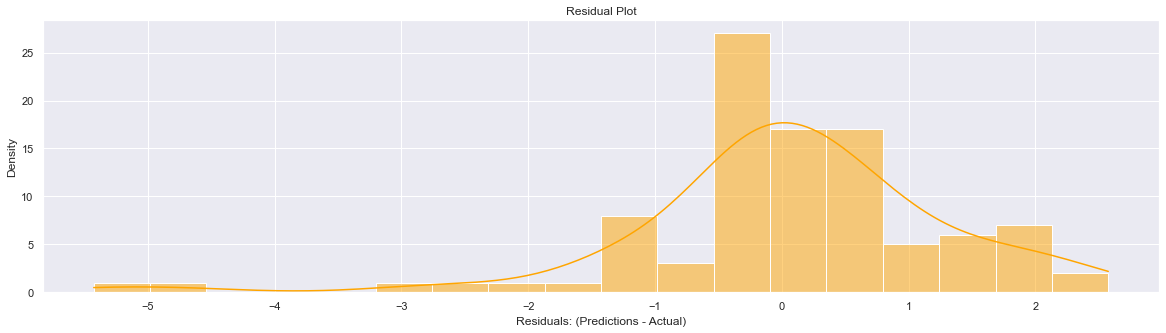

In [32]:
plt.figure(figsize=(20,5))
sns.histplot(residuals, kde=True, color="orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

In [33]:
from sklearn.metrics import r2_score
print("R-squared Score Obtained for predicting Life Expectancy is {0}".format(r2_score(Y_test, model_predictions)))

R-squared Score Obtained for predicting Life Expectancy is 0.9088273099317647
